# EDA daset Spotify


Import of the necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



We import the CSV with the data and print the first 5 rows.

In [7]:
df = pd.read_csv('../Dirty-Data/spotify_dataset.csv')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We check the data types of each column in case there is any inconsistency with the nature of the data.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We check how many null values are in the DataFrame.

In [9]:
null_data = df.isnull().sum()
print(null_data)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Since there are only 4 null values, we delete them to have a dataset clean of nulls.

In [10]:
df = df.dropna()
null_data = df.isnull().sum()
print(null_data)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


We check if there are any duplicate data.

In [11]:
duplicates = df.duplicated().sum()
print(duplicates)

0


Now we delete the "acousticness" column since it won't be useful for the upcoming analyses.

In [12]:
df = df.drop(columns='acousticness')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

Finally, we save the data into a CSV file.

In [13]:
df.to_csv('../cleanData/spotify-clean.csv', index=False)

# Visualizations.



This graph shows us the songs that each artist has released.

<Axes: title={'center': 'Top 10 Artists with Most Songs'}, ylabel='artists'>

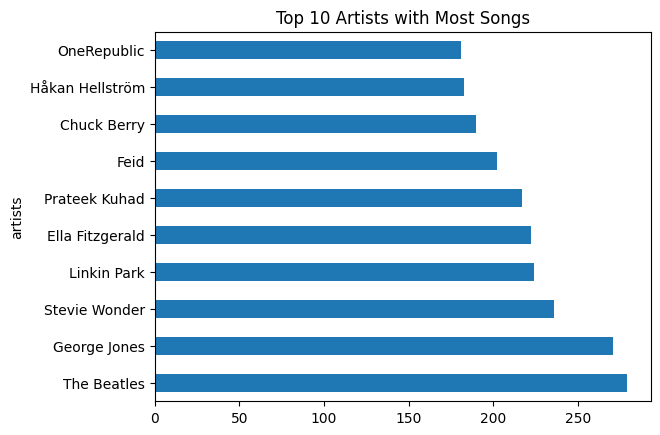

In [14]:
artist_counts = df['artists'].value_counts().head(10)
artist_counts.plot(kind='barh', title='Top 10 Artists with Most Songs')

Popularity of each genre, showing only the top 10 most popular genres.

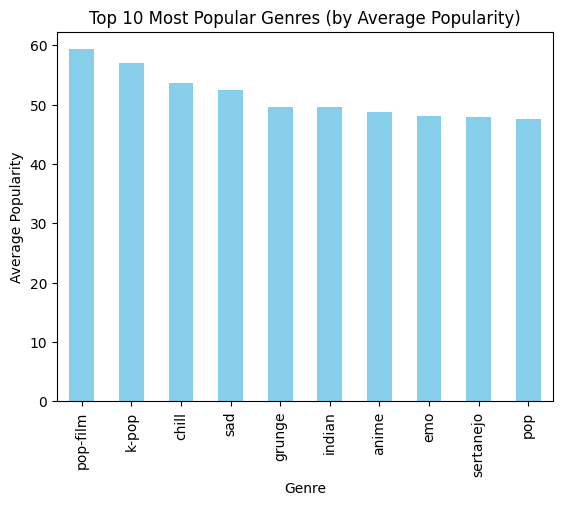

In [15]:
popularity_by_genre = df.groupby('track_genre')['popularity'].mean()

top_10_genres = popularity_by_genre.nlargest(10)

top_10_genres.plot(kind='bar', title='Top 10 Most Popular Genres (by Average Popularity)', color='skyblue')

plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

Scatter plot showing the positivity of songs against their duration in milliseconds.

<Axes: title={'center': 'Duration vs Valence'}, xlabel='duration_ms', ylabel='valence'>

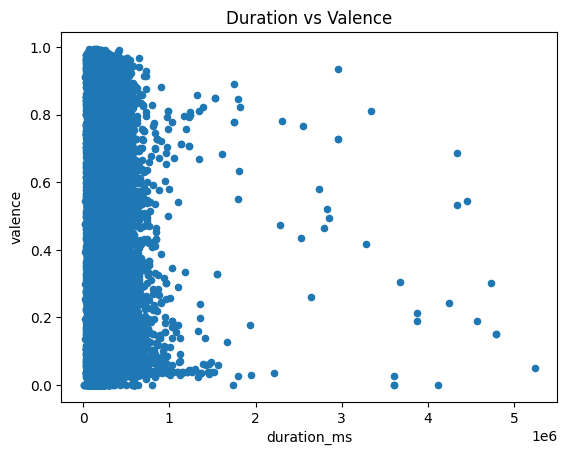

In [16]:
df.plot(kind='scatter', x='duration_ms', y='valence', title='Duration vs Valence')

Show the genres with the most songs.

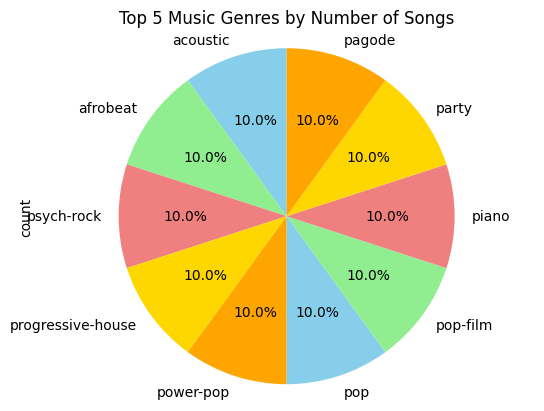

In [17]:
genre_counts = df['track_genre'].value_counts()

top_10_genres = genre_counts.head(10)

top_10_genres.plot(kind='pie', title='Top 5 Music Genres by Number of Songs', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'])

plt.axis('equal')

plt.show()

Here it shows us the total number of songs from all genres to confirm that the pie chart above is correct.

In [18]:
value_total = df['track_genre'].value_counts()

print(value_total)

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64


The chart shows the dispersion between the popularity of songs and whether the song contains many or few words.

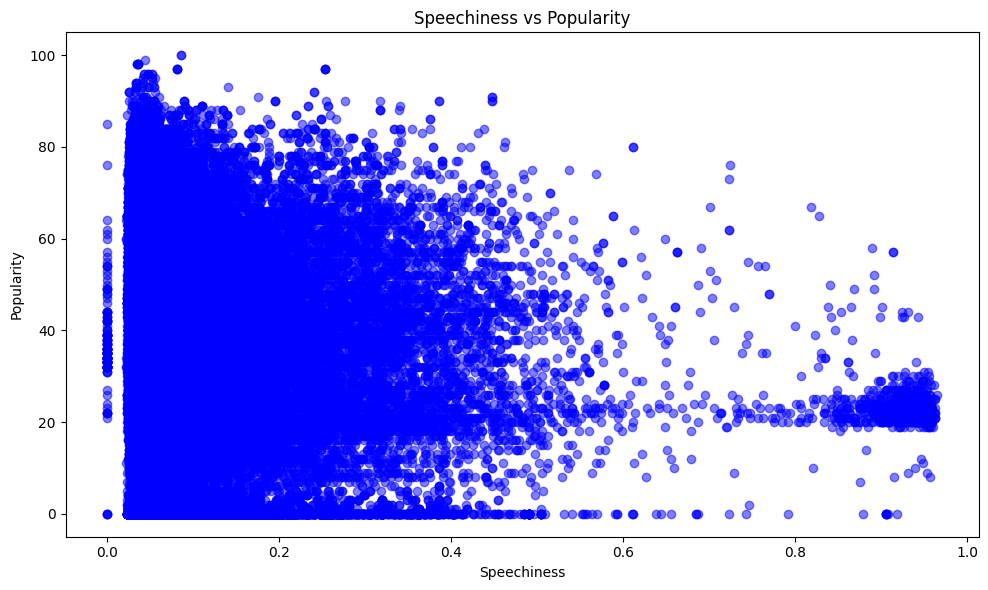

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['speechiness'], df['popularity'], color='blue', alpha=0.5)

plt.title('Speechiness vs Popularity')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()